## Statystyka matematyczna I {-}

- Praca domowa 5

- Uladzislau Darhevich 108519

### Zadanie 1 {-}

$$X_1, X_2, ... X_n \sim  \text{Beta}(\theta, 1)$$



Wyznaczyć przedziały ufności dla $\theta$, jeżeli $n=$ 12, oraz $1 - \alpha = 0.98$

Kandydat na $U$ będzie: 

$$\sum_{i=1}^{n}(-\text{ln} X_i)$$

$$U = \theta\sum_{i=1}^{n}(-\text{ln} X_i)\Longrightarrow U\sim \text{Gamma}(n,1)$$

$$a = F_{\text{Gamma}(0,1)}^{-1}\bigg(\frac{\alpha}{2}\bigg)$$

$$b = F_{\text{Gamma}(0,1)}^{-1}\bigg(1 - \frac{\alpha}{2}\bigg)$$

In [18]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt


alpha = 0.02
n = 12
a = sc.gamma.ppf(alpha/2, n, 1)
b = sc.gamma.ppf(1-alpha/2, n, 1)
print(f"a = {round(a, 3)}, b =  {round(b, 3)}")

a = 6.428, b =  22.49


$$\frac{6.428}{\sum_{i=1}^{n}-\text{ln}X_i}\le \theta\le \frac{22.49}{\sum_{i=1}^{n}-\text{ln}X_i}$$

In [19]:
def mean_confidence_interval(data, confidence=(1-alpha)):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sc.sem(a)
    h = se * sc.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

thetas = np.linspace(1, 10, num=10)

m = np.zeros(len(thetas))
lower = np.zeros(len(thetas))
upper = np.zeros(len(thetas))

for i in range(len(thetas)):
    sample = np.random.beta(thetas[i], 1, n)
    m[i], lower[i], upper[i] = mean_confidence_interval(sample)



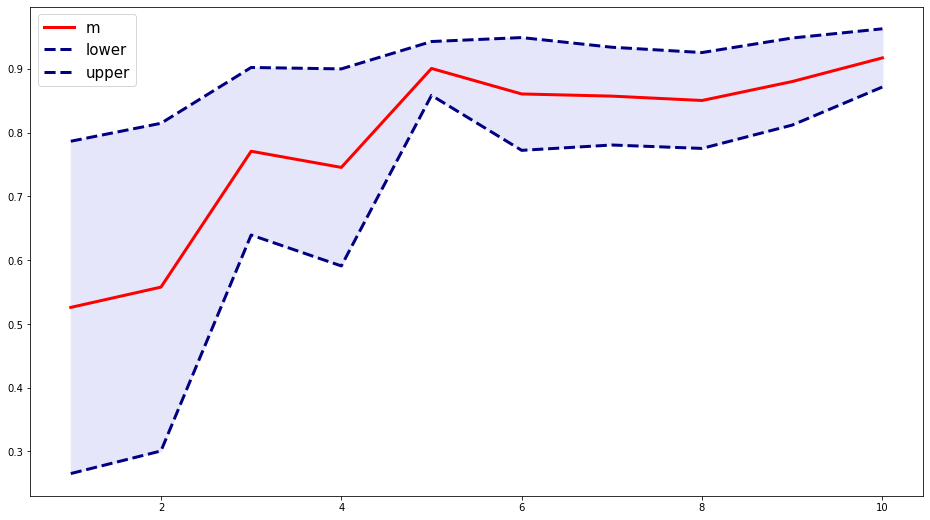

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(thetas, m, lw=3, label='m', color='red')
plt.plot(thetas, lower, lw=3, label='lower', color='navy', linestyle='--')
plt.plot(thetas, upper, lw=3, label='upper', color='navy', linestyle='--')
plt.legend(fontsize=15)
plt.fill_between(thetas, lower, upper, color='lavender')
plt.show();